#Kaggle Access
-> This Python 3 environment comes with many helpful analytics libraries installed
-> It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
-> For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

-> Input data files are available in the read-only "../input/" directory
-> For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

-> You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
-> You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

#Step 01 : Import important libraries

In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import confusion_matrix, classification_report, precision_score, accuracy_score, recall_score, roc_curve, auc
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

#Step 02 : Access Dataset through directory

In [12]:
data = pd.read_csv('/content/EEG.machinelearing_data_BRMH.csv')

#Step 03 : Print Overview of Columns, Rows, DataTypes

In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 847 entries, 0 to 846
Columns: 1149 entries, no. to COH.F.gamma.r.O1.s.O2
dtypes: float64(1144), int64(1), object(4)
memory usage: 7.4+ MB
None


#Step 04 : Print no. of rows, columns along with first 5 rows

In [5]:
print('No. of rows & columns :',data.shape)
print('Top 5 rows are :')
data.head(5)

No. of rows & columns : (847, 1149)
Top 5 rows are :


,no.,sex,age,eeg.date,education,IQ,main.disorder,specific.disorder,AB.A.delta.a.FP1,AB.A.delta.b.FP2,...,COH.F.gamma.o.Pz.p.P4,COH.F.gamma.o.Pz.q.T6,COH.F.gamma.o.Pz.r.O1,COH.F.gamma.o.Pz.s.O2,COH.F.gamma.p.P4.q.T6,COH.F.gamma.p.P4.r.O1,COH.F.gamma.p.P4.s.O2,COH.F.gamma.q.T6.r.O1,COH.F.gamma.q.T6.s.O2,COH.F.gamma.r.O1.s.O2
0,1,M,57.0,2012.8.30,NaN,NaN,Addictive disorder,Alcohol use disorder,35.998557,21.717375,...,55.989192,16.739679,23.452271,45.678820,30.167520,16.918761,48.850427,9.422630,34.507082,28.613029
1,2,M,37.0,2012.9.6,6.0,120.0,Addictive disorder,Alcohol use disorder,13.425118,11.002916,...,45.595619,17.510824,26.777368,28.201062,57.108861,32.375401,60.351749,13.900981,57.831848,43.463261
2,3,M,32.0,2012.9.10,16.0,113.0,Addictive disorder,Alcohol use disorder,29.941780,27.544684,...,99.475453,70.654171,39.131547,69.920996,71.063644,38.534505,69.908764,27.180532,64.803155,31.485799
3,4,M,35.0,2012.10.8,18.0,126.0,Addictive disorder,Alcohol use disorder,21.496226,21.846832,...,59.986561,63.822201,36.478254,47.117006,84.658376,24.724096,50.299349,35.319695,79.822944,41.141873
4,5,M,36.0,2012.10.18,16.0,112.0,Addictive disorder,Alcohol use disorder,37.775667,33.607679,...,61.462720,59.166097,51.465531,58.635415,80.685608,62.138436,75.888749,61.003944,87.455509,70.531662


#Step 05 : Acquire the datatype of one of the Nan containg columns & fill them with their mean

In [6]:
print('Education datatype : ',data['education'].dtypes)
# Calculate the mean only for numeric columns
data = data.fillna(data.mean(numeric_only=True))

Education datatype :  float64


In [7]:
data.head()

,no.,sex,age,eeg.date,education,IQ,main.disorder,specific.disorder,AB.A.delta.a.FP1,AB.A.delta.b.FP2,...,COH.F.gamma.o.Pz.p.P4,COH.F.gamma.o.Pz.q.T6,COH.F.gamma.o.Pz.r.O1,COH.F.gamma.o.Pz.s.O2,COH.F.gamma.p.P4.q.T6,COH.F.gamma.p.P4.r.O1,COH.F.gamma.p.P4.s.O2,COH.F.gamma.q.T6.r.O1,COH.F.gamma.q.T6.s.O2,COH.F.gamma.r.O1.s.O2
0,1,M,57.0,2012.8.30,13.461538,101.387755,Addictive disorder,Alcohol use disorder,35.998557,21.717375,...,55.989192,16.739679,23.452271,45.678820,30.167520,16.918761,48.850427,9.422630,34.507082,28.613029
1,2,M,37.0,2012.9.6,6.000000,120.000000,Addictive disorder,Alcohol use disorder,13.425118,11.002916,...,45.595619,17.510824,26.777368,28.201062,57.108861,32.375401,60.351749,13.900981,57.831848,43.463261
2,3,M,32.0,2012.9.10,16.000000,113.000000,Addictive disorder,Alcohol use disorder,29.941780,27.544684,...,99.475453,70.654171,39.131547,69.920996,71.063644,38.534505,69.908764,27.180532,64.803155,31.485799
3,4,M,35.0,2012.10.8,18.000000,126.000000,Addictive disorder,Alcohol use disorder,21.496226,21.846832,...,59.986561,63.822201,36.478254,47.117006,84.658376,24.724096,50.299349,35.319695,79.822944,41.141873
4,5,M,36.0,2012.10.18,16.000000,112.000000,Addictive disorder,Alcohol use disorder,37.775667,33.607679,...,61.462720,59.166097,51.465531,58.635415,80.685608,62.138436,75.888749,61.003944,87.455509,70.531662


#Step 06 : Encoding the target column

In [13]:
# Save the original values before encoding
original_disorders = data[['specific.disorder']].copy()

# Apply encoding
encoder.fit(data[['specific.disorder']])
data['specific.disorder'] = encoder.transform(data[['specific.disorder']])

# Get the unique original values and their corresponding encoded labels
unique_original_disorders = original_disorders['specific.disorder'].unique()
unique_encoded_disorders = encoder.transform(unique_original_disorders.reshape(-1, 1)).flatten()

# Print each unique original value with its corresponding encoded label
print("Actual disorder names with their encoded labels:")
for original, encoded in zip(unique_original_disorders, unique_encoded_disorders):
    print({original},' ',{encoded})


Actual disorder names with their encoded labels:
{'Alcohol use disorder'}   {2.0}
{'Acute stress disorder'}   {0.0}
{'Depressive disorder'}   {5.0}
{'Healthy control'}   {6.0}
{'Behavioral addiction disorder'}   {3.0}
{'Obsessive compulsitve disorder'}   {7.0}
{'Schizophrenia'}   {10.0}
{'Panic disorder'}   {8.0}
{'Social anxiety disorder'}   {11.0}
{'Posttraumatic stress disorder'}   {9.0}
{'Adjustment disorder'}   {1.0}
{'Bipolar disorder'}   {4.0}


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but OrdinalEncoder was fitted with feature names
  warnings.warn(


In [14]:
#Initialize the encoder
encoder = OrdinalEncoder()

encoder.fit(data[['sex']])
data['sex']= encoder.transform(data[['sex']])
encoder.fit(data[['main.disorder']])
data['main.disorder']= encoder.transform(data[['main.disorder']])

encoder.fit(data[['specific.disorder']])
data['specific.disorder']= encoder.transform(data[['specific.disorder']])
print('The target column is encoded...')

The target column is encoded...


#Step 07 : Drop unncessary columns

In [15]:
# Check if the columns exist in the DataFrame before dropping them
columns_to_drop = ['no.', 'eeg.date']
existing_columns = [col for col in columns_to_drop if col in data.columns]

if existing_columns:
    data = data.drop(columns=existing_columns, axis=1)
else:
    print("The specified columns do not exist in the DataFrame.")
print('Non pivotal columns are removed')

Non pivotal columns are removed


#Step 08 : Check for null value containing columns

In [16]:
print('The no.of null value containing column : ' )
sum(data.isnull().sum())

The no.of null value containing column : 


973

Step 09 : Declare the target column

In [17]:
X= data.drop(columns=['specific.disorder','Unnamed: 122'], axis=1)
y = data['specific.disorder']
print('The target column is : specific.disorder')

The target column is : specific.disorder


Step 10 : Fitting an Elastic Net model using scikit-learn

In [19]:
X.dropna(inplace=True)
y = y[X.index] # make sure that y and X have the same index
elastic_net = ElasticNet( alpha =.1, l1_ratio= .5)
elastic_net.fit(X, y)
print('ElasticNet model fitted')

ElasticNet model fitted


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.699e+02, tolerance: 8.545e-01
  model = cd_fast.enet_coordinate_descent(


Step11 :  Identifying the top 50 most important features based on their absolute values

In [20]:
coef_abs = np.abs(elastic_net.coef_)
sorted_coef_abs = np.argsort(coef_abs)[::-1]
top_50_features = sorted_coef_abs[:50]
print('50 most important features are selected')

50 most important features are selected


In [21]:
# Assuming X is a DataFrame or you have a list of feature names
feature_names = X.columns if hasattr(X, 'columns') else [f'Feature {i}' for i in range(X.shape[1])]

# Get the absolute values of the coefficients
coef_abs = np.abs(elastic_net.coef_)

# Sort the coefficients in descending order based on their importance
sorted_coef_abs = np.argsort(coef_abs)[::-1]

# Select the top 50 most important features
top_50_features = sorted_coef_abs[:50]

# Print the feature names and their corresponding coefficient magnitudes
print("Top 50 most important features are : ")
for idx in top_50_features:
    print(f"{feature_names[idx]}")
    #: {elastic_net.coef_[idx]}

Top 50 most important features are : 
main.disorder
AB.F.gamma.c.F7
COH.A.delta.l.T4.s.O2
AB.D.beta.c.F7
COH.A.delta.k.C4.s.O2
COH.D.beta.i.C3.q.T6
COH.B.theta.l.T4.r.O1
COH.A.delta.e.Fz.q.T6
COH.C.alpha.i.C3.p.P4
COH.E.highbeta.a.FP1.f.F4
COH.F.gamma.g.F8.n.P3
COH.F.gamma.g.F8.p.P4
AB.F.gamma.q.T6
COH.E.highbeta.b.FP2.h.T3
AB.E.highbeta.e.Fz
AB.D.beta.f.F4
COH.D.beta.e.Fz.g.F8
AB.A.delta.f.F4
COH.A.delta.k.C4.q.T6
COH.A.delta.i.C3.m.T5
COH.A.delta.b.FP2.n.P3
COH.B.theta.a.FP1.j.Cz
COH.F.gamma.l.T4.s.O2
COH.E.highbeta.g.F8.h.T3
AB.A.delta.r.O1
COH.F.gamma.a.FP1.p.P4
COH.E.highbeta.n.P3.r.O1
COH.D.beta.a.FP1.s.O2
COH.B.theta.b.FP2.g.F8
COH.B.theta.c.F7.j.Cz
AB.B.theta.o.Pz
COH.C.alpha.a.FP1.k.C4
COH.F.gamma.a.FP1.i.C3
COH.F.gamma.f.F4.j.Cz
COH.C.alpha.j.Cz.m.T5
COH.E.highbeta.m.T5.p.P4
COH.E.highbeta.k.C4.p.P4
AB.B.theta.g.F8
COH.D.beta.g.F8.i.C3
COH.E.highbeta.k.C4.s.O2
COH.B.theta.g.F8.l.T4
COH.A.delta.l.T4.q.T6
COH.B.theta.l.T4.s.O2
COH.C.alpha.d.F3.m.T5
COH.F.gamma.f.F4.l.T4
AB.F.ga

#Step 12 : Generation of most important features list

In [22]:
top_50_feature_names = [X.columns[i] for i in top_50_features]
print('Most important features list has been created')

Most important features list has been created


#Step 13 : Count of target column values

<Axes: xlabel='specific.disorder', ylabel='count'>

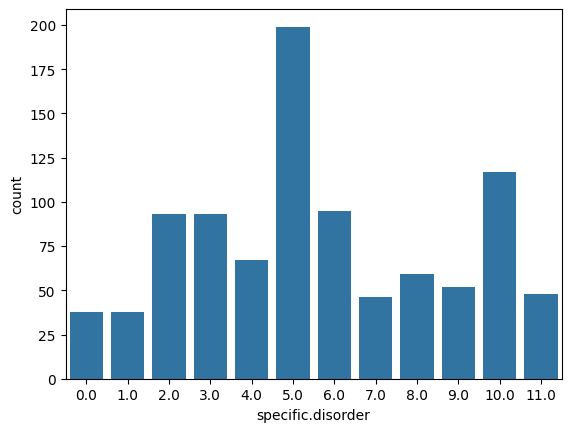

In [23]:
sns.countplot(x="specific.disorder",data=data)

#Step 14 : Creating the Dataframe of top 50 features

In [24]:
df1=[]
for j in list(top_50_feature_names):
   df1.append(data[j])
df1 = pd.concat(df1, axis = 1)
print('Dataframe of top 50 features has been created...')

Dataframe of top 50 features has been created...


Step 15 : Data OverSampling

In [27]:
# Ensure that df1 and y have the same number of rows before applying SMOTE
df1 = df1.iloc[:len(y)]

smote = SMOTE(sampling_strategy ='all', random_state = 42)
X_resampled, y_resampled = smote.fit_resample(df1, y)
print('Data OverSampling completed...')

Data OverSampling completed...


#Step 16 : Oversampled visualization

<ipython-input-28-60a52a4b5416>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis")


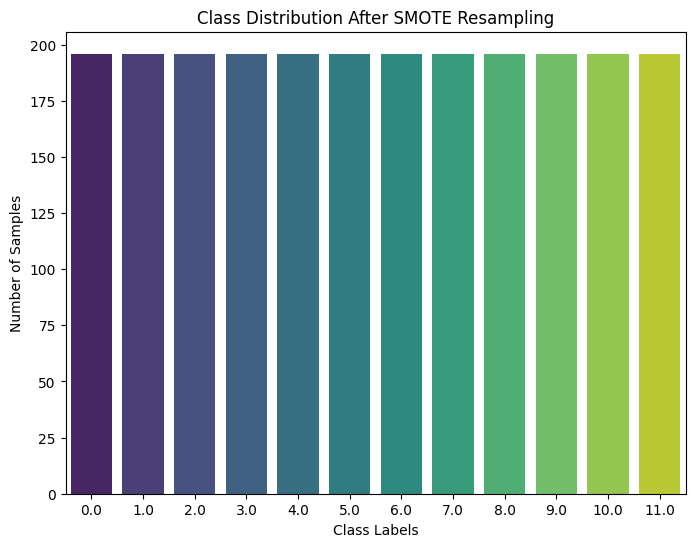

In [28]:
# Count the occurrences of each class in the resampled target
class_counts = pd.Series(y_resampled).value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis")

# Add labels and title
plt.xlabel('Class Labels')
plt.ylabel('Number of Samples')
plt.title('Class Distribution After SMOTE Resampling')
plt.show()


#Step 17 : Normalize or Standardize the features

In [29]:
#Initialize the Standardization
scaler = StandardScaler()
scaler.fit(X_resampled)
# y = y.reshape(-1,1)
df3= scaler.transform(X_resampled)
# y= scaler.transform(y)
print('Data has been normalized...')

Data has been normalized...


#Step 18 : Train test Split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(df3, y_resampled , test_size =.2, stratify = y_resampled)
print('Train test split completed...')

Train test split completed...


In [31]:
df3

array([[-1.50199241, -0.38691085, -1.30718319, ..., -1.27183582,
        -1.09190818, -1.18723608],
       [-1.50199241, -0.58183401, -1.00516537, ..., -1.10747914,
        -0.22385619, -1.31928759],
       [-1.50199241, -0.58804899, -0.66702753, ..., -0.4048955 ,
        -0.77309486, -0.6410532 ],
       ...,
       [ 1.54766221, -0.30096791, -1.04134984, ..., -0.98506002,
        -0.70211205, -1.22909676],
       [-1.29759317, -0.09320451,  1.05272657, ...,  1.17114523,
         1.1319299 , -0.21795619],
       [ 0.05791919, -0.00172522, -0.84531149, ..., -1.25713479,
        -0.56479126, -0.30812497]])

In [32]:
y_resampled

,specific.disorder
0,2.0
1,2.0
2,2.0
3,2.0
4,2.0
...,...
2347,11.0
2348,11.0
2349,11.0
2350,11.0


#Step 19 : Import necessary libraries

In [ ]:
pip install dask[dataframe]



```
# This is formatted as code
```

#Step 20 : Fit model, calculate multiple performance metrics

In [34]:
def my_function(model):
    model.fit(X_train, y_train)
    test_data_prediction = model.predict(X_test)
    accuracy = accuracy_score(y_test, test_data_prediction)
    precision = precision_score(test_data_prediction, y_test, average='weighted')
    precision1 = precision_score(test_data_prediction, y_test, average='macro')
    precision2 = precision_score(test_data_prediction, y_test, average='micro')
    recall = recall_score(y_test, test_data_prediction, average='weighted')
    recall1 = recall_score(y_test, test_data_prediction, average='macro')
    recall2 = recall_score(y_test, test_data_prediction, average='micro')
    f1_score = 2 * (precision * recall) / (precision + recall)
    f1_score1 = 2 * (precision1 * recall1) / (precision1 + recall1)
    f1_score2 = 2 * (precision2 * recall2) / (precision2+ recall2)
    kf = KFold(n_splits=10, shuffle=True)



    # Evaluate model using cross-validation
    scores = cross_val_score(model, X_train, y_train, cv=kf)
    print(scores)

    # Print average score
    print("Cross Validation Accuracy: %0.4f" % scores.mean())
    # fpr, tpr, thresholds = metrics.roc_curve(Y_test, test_data_prediction)
    # auc = metrics.auc(fpr, tpr)
    print('Accuracy score of the model', model , '=', round(accuracy,4))
    print('Weighted Precision score of the model', model , '=', round(precision,4))
    print('Macro Precision1 score of the model', model , '=', round(precision1,4))
    print('Micro Precision2 score of the model', model , '=', round(precision2,4))
    print('Weighted Recall score of the model', model , '=', round(recall,4))
    print('Macro Recall1 score of the model', model , '=', round(recall1,4))
    print('Micro Recall2 score of the model', model , '=', round(recall2,4))
    print('Weighted F1_score score of the model', model , '=', round(f1_score,4))
    print('Macro F1_score1 score of the model', model , '=', round(f1_score1,4))
    print('Micro F1_score2 score of the model', model , '=', round(f1_score2,4))
    # print('Cross validation accuracies for the', model, '=', cv_score, 'and', mean_accuracy)
    # print('AUC score for the', model, '=', round(auc,4))


    cr= classification_report(y_test, test_data_prediction)

    print(cr)


def my_function(model):
    # Fit the model
    model.fit(X_train, y_train)
    
    # Predict on the test set
    test_data_prediction = model.predict(X_test)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, test_data_prediction)
    precision = precision_score(y_test, test_data_prediction, average='weighted')
    precision1 = precision_score(y_test, test_data_prediction, average='macro')
    precision2 = precision_score(y_test, test_data_prediction, average='micro')
    recall = recall_score(y_test, test_data_prediction, average='weighted')
    recall1 = recall_score(y_test, test_data_prediction, average='macro')
    recall2 = recall_score(y_test, test_data_prediction, average='micro')
    f1_score = 2 * (precision * recall) / (precision + recall)
    f1_score1 = 2 * (precision1 * recall1) / (precision1 + recall1)
    f1_score2 = 2 * (precision2 * recall2) / (precision2 + recall2)
    
    # Confusion matrix
    conf_matrix = confusion_matrix(y_test, test_data_prediction)
    
    # ROC Curve and AUC
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:, 1]
        fpr, tpr, thresholds = roc_curve(y_test, y_prob)
        auc_score = auc(fpr, tpr)
    else:
        fpr, tpr, thresholds = None, None, None
        auc_score = None
    
    # Cross-validation
    kf = KFold(n_splits=10, shuffle=True)
    scores = cross_val_score(model, X_train, y_train, cv=kf)
    
    # Print results
    print(f"Cross Validation Accuracy: {scores.mean():.4f}")
    print(f"Accuracy score of the model {model}: {accuracy:.4f}")
    print(f"Weighted Precision score of the model {model}: {precision:.4f}")
    print(f"Macro Precision score of the model {model}: {precision1:.4f}")
    print(f"Micro Precision score of the model {model}: {precision2:.4f}")
    print(f"Weighted Recall score of the model {model}: {recall:.4f}")
    print(f"Macro Recall score of the model {model}: {recall1:.4f}")
    print(f"Micro Recall score of the model {model}: {recall2:.4f}")
    print(f"Weighted F1 score of the model {model}: {f1_score:.4f}")
    print(f"Macro F1 score of the model {model}: {f1_score1:.4f}")
    print(f"Micro F1 score of the model {model}: {f1_score2:.4f}")
    
    print("Confusion Matrix:")
    print(conf_matrix)
    
    if auc_score is not None:
        print(f"AUC score of the model {model}: {auc_score:.4f}")
        plt.figure()
        plt.plot(fpr, tpr, marker='.')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve for model {model}')
        plt.show()
    else:
        print("Model does not support probability predictions. AUC cannot be computed.")
    
    cr = classification_report(y_test, test_data_prediction)
    print("Classification Report:")
    print(cr)


#Step 21 : Model 01

In [ ]:
lgbm_model = LGBMClassifier(verbose=-1)  # Suppress LightGBM logs
my_function(lgbm_model)

Step 22 : Model 02

In [ ]:
my_function(GradientBoostingClassifier())

#Step 23 : Model 03

In [ ]:
my_function(XGBClassifier())

In [ ]:
my_function(AdaBoostClassifier())

In [37]:
from sklearn.linear_model import LogisticRegression

# Apply function to Logistic Regression
logistic_model = LogisticRegression()
my_function(logistic_model)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

[0.41269841 0.5        0.39893617 0.41489362 0.45744681 0.44148936
 0.46276596 0.41489362 0.42021277 0.40425532]
Cross Validation Accuracy: 0.4328
Accuracy score of the model LogisticRegression() = 0.4055
Weighted Precision score of the model LogisticRegression() = 0.4514
Macro Precision1 score of the model LogisticRegression() = 0.4052
Micro Precision2 score of the model LogisticRegression() = 0.4055
Weighted Recall score of the model LogisticRegression() = 0.4055
Macro Recall1 score of the model LogisticRegression() = 0.4052
Micro Recall2 score of the model LogisticRegression() = 0.4055
Weighted F1_score score of the model LogisticRegression() = 0.4272
Macro F1_score1 score of the model LogisticRegression() = 0.4052
Micro F1_score2 score of the model LogisticRegression() = 0.4055
              precision    recall  f1-score   support

         0.0       0.62      0.79      0.70        39
         1.0       0.38      0.46      0.42        39
         2.0       0.35      0.38      0.37 

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#Step 24 : Model Prediction

In [ ]:
# Dictionary mapping encoded values to disorder names
disorder_mapping = {
    2.0: 'Alcohol use disorder',
    0.0: 'Acute stress disorder',
    5.0: 'Depressive disorder',
    6.0: 'Healthy control',
    3.0: 'Behavioral addiction disorder',
    7.0: 'Obsessive compulsive disorder',
    10.0: 'Schizophrenia',
    8.0: 'Panic disorder',
    11.0: 'Social anxiety disorder',
    9.0: 'Posttraumatic stress disorder',
    1.0: 'Adjustment disorder',
    4.0: 'Bipolar disorder'
}

# Function to get the disorder name from the encoded value
def get_disorder_name_from_prediction(encoded_value):
    return disorder_mapping.get(encoded_value, "Unknown disorder")

In [ ]:
# Your existing model training and prediction logic
# Initialize XGBClassifier
xgb_model = XGBClassifier()

# Call the function to train the model (Assumes `my_function` trains the model)
my_function(xgb_model)

# Assuming 'data' is your DataFrame and 'specific.disorder' is the target column
# First, encode the target column 'specific.disorder' using LabelEncoder (if not done already)
label_encoder = LabelEncoder()
data['specific.disorder_encoded'] = label_encoder.fit_transform(data['specific.disorder'])

# Get the actual disorder names (inverse mapping from encoded labels)
specific_disorder_labels = label_encoder.classes_

# After the model is trained, use the custom input for prediction
custom_input = [[-1.39152822,  0.48664021, -0.84291855,  1.07377379,  0.4676795 ,
       -0.04836744, -0.96574004, -0.76951914,  0.00777138,  1.37207286,
        1.21769102, -1.43033018, -0.97261923,  0.49147411,  0.69148268,
        0.15654763,  0.946097  ,  0.84995292,  0.42914624,  0.22876536,
        1.20364894, -0.8246202 ,  0.40937834,  1.2569821 , -0.2990195 ,
        1.25080503,  0.70043176,  0.76379308, -1.37772789, -1.03568303,
       -0.85468038, -0.39999926,  1.50731409, -1.20788184, -0.44078488,
       -0.70778515,  0.90302452,  0.39441742, -1.14148251,  1.97363813,
        0.45300629,  0.19423655, -0.7761609 ,  0.77438332, -0.23152332,
       -0.48111875, -0.63425346, -1.17420149,  0.81493528, -1.45876944]]

# Predict using the trained model
custom_prediction = xgb_model.predict(custom_input)

# Convert the numerical prediction to the actual disorder name using the label encoder
predicted_disorder_encoded = custom_prediction[0]  # Get the encoded value

# Call the function to get the respective disease name
predicted_disorder_name = get_disorder_name_from_prediction(predicted_disorder_encoded)

# Print the predicted disorder name (actual name)
print("Predicted disorder name:", predicted_disorder_name)


In [ ]:
# Example usage with AdaBoostClassifier
ada_model = AdaBoostClassifier()

# Call the function
my_function(ada_model)

# Assuming 'data' is your DataFrame and 'specific.disorder' is the target column
# First, encode the target column 'specific.disorder' using LabelEncoder (if not done already)
label_encoder = LabelEncoder()
data['specific.disorder_encoded'] = label_encoder.fit_transform(data['specific.disorder'])

# Get the actual disorder names (inverse mapping from encoded labels)
specific_disorder_labels = label_encoder.classes_

# After the model is trained, use the custom input for prediction
custom_input = [[-1.39152822,  0.48664021, -0.84291855,  1.07377379,  0.4676795 ,
       -0.04836744, -0.96574004, -0.76951914,  0.00777138,  1.37207286,
        1.21769102, -1.43033018, -0.97261923,  0.49147411,  0.69148268,
        0.15654763,  0.946097  ,  0.84995292,  0.42914624,  0.22876536,
        1.20364894, -0.8246202 ,  0.40937834,  1.2569821 , -0.2990195 ,
        1.25080503,  0.70043176,  0.76379308, -1.37772789, -1.03568303,
       -0.85468038, -0.39999926,  1.50731409, -1.20788184, -0.44078488,
       -0.70778515,  0.90302452,  0.39441742, -1.14148251,  1.97363813,
        0.45300629,  0.19423655, -0.7761609 ,  0.77438332, -0.23152332,
       -0.48111875, -0.63425346, -1.17420149,  0.81493528, -1.45876944]]

custom_prediction = ada_model.predict(custom_input)

# Predict using the trained model
custom_prediction = xgb_model.predict(custom_input)

# Convert the numerical prediction to the actual disorder name using the label encoder
predicted_disorder_encoded = custom_prediction[0]  # Get the encoded value

# Call the function to get the respective disease name
predicted_disorder_name = get_disorder_name_from_prediction(predicted_disorder_encoded)

# Print the predicted disorder name (actual name)
print("Predicted disorder name:", predicted_disorder_name)


In [ ]:
# Example usage with GradientBoostingClassifier
gbc_model = GradientBoostingClassifier()

# Call the function
my_function(gbc_model)

# Assuming 'data' is your DataFrame and 'specific.disorder' is the target column
# First, encode the target column 'specific.disorder' using LabelEncoder (if not done already)
label_encoder = LabelEncoder()
data['specific.disorder_encoded'] = label_encoder.fit_transform(data['specific.disorder'])

# Get the actual disorder names (inverse mapping from encoded labels)
specific_disorder_labels = label_encoder.classes_

# After the model is trained, use the custom input for prediction
custom_input = [[-1.39152822,  0.48664021, -0.84291855,  1.07377379,  0.4676795 ,
       -0.04836744, -0.96574004, -0.76951914,  0.00777138,  1.37207286,
        1.21769102, -1.43033018, -0.97261923,  0.49147411,  0.69148268,
        0.15654763,  0.946097  ,  0.84995292,  0.42914624,  0.22876536,
        1.20364894, -0.8246202 ,  0.40937834,  1.2569821 , -0.2990195 ,
        1.25080503,  0.70043176,  0.76379308, -1.37772789, -1.03568303,
       -0.85468038, -0.39999926,  1.50731409, -1.20788184, -0.44078488,
       -0.70778515,  0.90302452,  0.39441742, -1.14148251,  1.97363813,
        0.45300629,  0.19423655, -0.7761609 ,  0.77438332, -0.23152332,
       -0.48111875, -0.63425346, -1.17420149,  0.81493528, -1.45876944]]
custom_prediction = gbc_model.predict(custom_input)

# Predict using the trained model
custom_prediction = xgb_model.predict(custom_input)

# Convert the numerical prediction to the actual disorder name using the label encoder
predicted_disorder_encoded = custom_prediction[0]  # Get the encoded value

# Call the function to get the respective disease name
predicted_disorder_name = get_disorder_name_from_prediction(predicted_disorder_encoded)

# Print the predicted disorder name (actual name)
print("Predicted disorder name:", predicted_disorder_name)

In [ ]:
# Initialize KNeighborsClassifier with default parameters
knn_model = KNeighborsClassifier()

# Call the function to train the model (Assumes `my_function` trains the model)
my_function(knn_model)

# After the model is trained, use the custom input for prediction
custom_input = [[-1.39152822,  0.48664021, -0.84291855,  1.07377379,  0.4676795 ,
       -0.04836744, -0.96574004, -0.76951914,  0.00777138,  1.37207286,
        1.21769102, -1.43033018, -0.97261923,  0.49147411,  0.69148268,
        0.15654763,  0.946097  ,  0.84995292,  0.42914624,  0.22876536,
        1.20364894, -0.8246202 ,  0.40937834,  1.2569821 , -0.2990195 ,
        1.25080503,  0.70043176,  0.76379308, -1.37772789, -1.03568303,
       -0.85468038, -0.39999926,  1.50731409, -1.20788184, -0.44078488,
       -0.70778515,  0.90302452,  0.39441742, -1.14148251,  1.97363813,
        0.45300629,  0.19423655, -0.7761609 ,  0.77438332, -0.23152332,
       -0.48111875, -0.63425346, -1.17420149,  0.81493528, -1.45876944]]

# Predict using the trained model
custom_prediction = knn_model.predict(custom_input)

# Get the encoded prediction and convert to actual disorder name
predicted_disorder_encoded = custom_prediction[0]
predicted_disorder_name = get_disorder_name_from_prediction(predicted_disorder_encoded)

# Print the predicted disorder name
print("Predicted disorder name (KNN):", predicted_disorder_name)


In [ ]:
# Initialize LGBMClassifier
lgbm_model = LGBMClassifier()

# Call the function to train the model
my_function(lgbm_model)

# Assuming 'data' is your DataFrame and 'specific.disorder' is the target column
# First, encode the target column 'specific.disorder' using LabelEncoder (if not done already)
label_encoder = LabelEncoder()
data['specific.disorder_encoded'] = label_encoder.fit_transform(data['specific.disorder'])

# Get the actual disorder names (inverse mapping from encoded labels)
specific_disorder_labels = label_encoder.classes_

# After the model is trained, use the custom input for prediction
custom_input = [[-1.39152822,  0.48664021, -0.84291855,  1.07377379,  0.4676795 ,
       -0.04836744, -0.96574004, -0.76951914,  0.00777138,  1.37207286,
        1.21769102, -1.43033018, -0.97261923,  0.49147411,  0.69148268,
        0.15654763,  0.946097  ,  0.84995292,  0.42914624,  0.22876536,
        1.20364894, -0.8246202 ,  0.40937834,  1.2569821 , -0.2990195 ,
        1.25080503,  0.70043176,  0.76379308, -1.37772789, -1.03568303,
       -0.85468038, -0.39999926,  1.50731409, -1.20788184, -0.44078488,
       -0.70778515,  0.90302452,  0.39441742, -1.14148251,  1.97363813,
        0.45300629,  0.19423655, -0.7761609 ,  0.77438332, -0.23152332,
       -0.48111875, -0.63425346, -1.17420149,  0.81493528, -1.45876944]]

# Predict using the trained model
custom_prediction = lgbm_model.predict(custom_input)

# Convert the numerical prediction to the actual disorder name using the label encoder
predicted_disorder_encoded = custom_prediction[0]  # Get the encoded value

# Call the function to get the respective disease name
predicted_disorder_name = get_disorder_name_from_prediction(predicted_disorder_encoded)

# Print the predicted disorder name (actual name)
print("Predicted disorder name:", predicted_disorder_name)


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import to_categorical
from keras.optimizers import Adam
from sklearn.preprocessing import LabelEncoder

# Load and preprocess the dataset
data = pd.read_csv('/kaggle/input/eeg-psychiatric-disorders-dataset/EEG.machinelearing_data_BRMH.csv')

# Ensure all features are numeric
for column in data.columns:
    if data[column].dtype == 'object':
        data[column] = LabelEncoder().fit_transform(data[column])

# Preprocessing the dataset
X = data.drop('main.disorder', axis=1).values  # Features
y = data['main.disorder'].values  # Target

# Normalize the features
X = X.astype('float32') / X.max()  # Normalize to [0,1]

# Convert the labels to categorical (one-hot encoding)
y = to_categorical(LabelEncoder().fit_transform(y))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the Fully Connected Neural Network (FCNN) model
model = Sequential()

# Input layer and first hidden layer
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))

# Dropout for regularization
model.add(Dropout(0.5))

# Second hidden layer
model.add(Dense(64, activation='relu'))

# Dropout
model.add(Dropout(0.5))

# Output layer (adjust the number of units to match the number of classes)
model.add(Dense(y_train.shape[1], activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy:.4f}')

# Predict and evaluate on test data
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test_classes, y_pred_classes)
precision = precision_score(y_test_classes, y_pred_classes, average='weighted')
recall = recall_score(y_test_classes, y_pred_classes, average='weighted')

print(f'Accuracy: {accuracy:.4f}')
print(f'Weighted Precision: {precision:.4f}')
print(f'Weighted Recall: {recall:.4f}')

# Print classification report
cr = classification_report(y_test_classes, y_pred_classes)
print(cr)


In [ ]:
X_test[2]